### Demo Aanbod Techstudenten o.b.v Studiekeuze123 db + DUO HO inschrijfbestanden

<img src="../../../docs/images/studiekeuze123_logo.png">

**Work in Progress**!!!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', 100)
import pandas_profiling as pdp
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../db_config/")
sys.path.insert(0, "../helper_functions/")

from config import DUO_HBO_CSV, DUO_WO_CSV, PATH_TO_RAW_DATA, PATH_TO_DATA_QUALITY_REPORT
from munge import prepare_duo_ho_files

from helper_functions.munge import (prepare_sdb_opleidingen_file, 
                                    prepare_duo_ho_files, 
                                    concat_unstack_duo_ho_files,
                                    clean_string_fields)
from helper_functions.utilities import pandas_join_key_dual

In [2]:
duo = concat_unstack_duo_ho_files(years=[2015, 2016, 2017, 2018, 2019])

INFO:root:Dropping 7 rows where <brin_nummer_actueel> is empty
INFO:root:Dropping columns: ['gemeentenaam', 'soort_instelling']
INFO:root:Renaming columns: {'provincie': 'provincie_duo', 'gemeentenummer': 'gemeentenummer_duo', 'type_hoger_onderwijs': 'soortopleiding_duo', 'brin_nummer_actueel': 'brinnummer_duo', 'instellingsnaam_actueel': 'instellingsnaam_duo', 'croho_onderdeel': 'croho_onderdeel_duo', 'croho_subonderdeel': 'croho_subonderdeel_duo', 'opleidingscode_actueel': 'opleidingscode_duo', 'opleidingsnaam_actueel': 'opleidingsnaam_duo', 'opleidingsvorm': 'opleidingsvorm_duo'}
INFO:root:Adding column: hbo
INFO:root:hbo_inscriptions_2019.csv shape: (3815, 17)
INFO:root:Dropping 6 rows where <brin_nummer_actueel> is empty
INFO:root:Dropping columns: ['gemeentenaam', 'soort_instelling']
INFO:root:Renaming columns: {'provincie': 'provincie_duo', 'gemeentenummer': 'gemeentenummer_duo', 'type_hoger_onderwijs': 'soortopleiding_duo', 'brin_nummer_actueel': 'brinnummer_duo', 'instellingsn

In [3]:
sdb = prepare_sdb_opleidingen_file(path=PATH_TO_RAW_DATA, file='studiekeuze123_all_20200417.xlsx', data_quality_report=None)

INFO:root:dropping columns: 
 ['IndicatieIntensiefProgramma', 'SelectieEisenIntensiefProgramma', 'VerhoogdCollegegeldIntensiefProgramma', 'BezoekadresStraat', 'BezoekadresNummer', 'BezoekadresPostcode', 'Bekostiging', 'AssociateDegree', 'JointDegree', 'BSAopmerking', 'Studielast', 'AlgemeenOordeel', 'SourceURL', 'TitelHodex', 'Afstandonderwijs', 'Avondonderwijs', 'HeeftBindendStudieAdvies', 'HeeftExtraInstroommoment', 'ExtraStudiekosten', 'LangeBeschrijvingOpleiding', 'Opleidingswebsite', 'PercentageStudentenNaarBuitenland', 'PercentageStudentenUitBuitenland', 'PercentageDocentenUitBuitenland', 'PercentageDocentenNaarBuitenland', 'PercentageAfstandsonderwijs', 'PercentageAvondonderwijs', 'WerkgroepGrootte', 'IsKoepelOpleiding', 'StudiekeuzecheckNaam', 'StudiekeuzecheckBeleidVoor1Mei', 'StudiekeuzecheckBeleidNa1Mei', 'StudiekeuzecheckVerplicht', 'StudiekeuzecheckUrl', 'StudiekeuzecheckOmschrijving', 'HeeftHonoursProgramma', 'InstroomVoltijd', 'InstroomDeeltijd', 'InstroomDuaal', 'Instro

In [5]:
from sdb_config import tech_keywords
def tag_tech_studies(input_df):
    
    cols_to_check = ['opleidingsnaam_duo', 'croho_onderdeel_duo', 
                 'cluster_sdb', 'sector_sdb', 'naamopleidingengels_sdb']
    
    logging.info(f"Searching for teck keywords in : {cols_to_check}")
    for c in cols_to_check:
        df['tech_keyword'] = df[c].str.findall(r"|".join(tech_keywords), flags=re.IGNORECASE)
        df['tech_keyword'] = df.tech_keyword.apply(", ".join)
        
    return df

ImportError: cannot import name 'tech_keywords' from 'sdb_config' (../db_config/sdb_config.py)

####

In [13]:
for c in cols_to_check:
    tech = df[df[c].fillna('unknown').str.contains(r"|".join(keywords), flags=re.IGNORECASE)]

In [14]:
tech

,brinnummer_duo,instellingsnaam_duo,croho_onderdeel_duo,croho_subonderdeel_duo,opleidingscode_duo,opleidingsnaam_duo,ho_type,soortopleiding_duo,gemeentenummer_duo,tot_2015_duo,tot_2016_duo,tot_2017_duo,tot_2018_duo,tot_2019_duo,cluster_sdb,sector_sdb,actieveopleiding_sdb,naamopleidingengels_sdb,eerstejaarsaantal_sdb,studentenaantal_sdb,_merge,tech_matchword
8,00MF,Hogeschool voor de Kunsten Utrecht,onderwijs,lerarenopleidingen op het gebied van de kunst,39100,Docent Beeldende Kunst en Vormgeving,hbo,bachelor,"[307, 344]",25.0,33.0,32.0,26.0,30.0,Kunstacademie,Kunst en Cultuur,1.0,Fine Art and Design in Education,53.0,178.0,both,Design
16,00MF,Hogeschool voor de Kunsten Utrecht,taal en cultuur,opleidingen op het gebied van de kunst,39111,Vormgeving,hbo,bachelor,"[307, 344]",254.0,264.0,321.0,308.0,263.0,Kunstacademie,Kunst en Cultuur,0.0,Design,365.0,1224.0,both,Design
17,00MF,Hogeschool voor de Kunsten Utrecht,taal en cultuur,opleidingen op het gebied van de kunst,80144,Design,hbo,associate degree,"[307, 344]",0.0,0.0,0.0,31.0,29.0,NaN,NaN,1.0,Design,31.0,31.0,left_only,Design
19,00MF,Hogeschool voor de Kunsten Utrecht,taal en cultuur,voortgezette kunstopleidingen,49114,Master of Arts in Fine Art and Design,hbo,master,"[307, 344]",11.0,10.0,30.0,28.0,22.0,Kunstacademie,Kunst en Cultuur,1.0,Master of Arts in Fine Art and Design,28.0,58.0,both,Design
21,00MF,Hogeschool voor de Kunsten Utrecht,techniek,n.v.t. (techniek),30036,Creative Media and Game Technologies,hbo,bachelor,"[307, 344]",86.0,117.0,106.0,101.0,118.0,Game Architecture and Design,Techniek,0.0,Creative Media and Game Technologies,134.0,478.0,both,"Creative, Media"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,31FR,NHL Stenden Hogeschool,techniek,n.v.t. (techniek),34475,Technische Informatica,hbo,bachelor,"[106, 114, 119, 80, 93, 14, 363, 193]",4.0,13.0,9.0,9.0,4.0,Informatica,Exact en Informatica,1.0,Computer Science,16.0,54.0,both,Computer Science
2508,31FR,NHL Stenden Hogeschool,techniek,n.v.t. (techniek),34479,Informatica,hbo,bachelor,"[106, 114, 119, 80, 93, 14, 363, 193]",75.0,76.0,61.0,91.0,62.0,Informatica,Exact en Informatica,1.0,Information Technology,89.0,322.0,both,"Information, Technology"
2509,31FR,NHL Stenden Hogeschool,techniek,n.v.t. (techniek),35168,Toegepaste Wiskunde,hbo,bachelor,"[106, 114, 119, 80, 93, 14, 363, 193]",29.0,28.0,18.0,26.0,13.0,Wiskunde,Exact en Informatica,1.0,Mathematical Engineering,45.0,143.0,both,Engineer
2513,31FR,NHL Stenden Hogeschool,techniek,n.v.t. (techniek),80067,Maritieme Techniek,hbo,associate degree,"[106, 114, 119, 80, 93, 14, 363, 193]",7.0,4.0,4.0,4.0,2.0,Zee- en Luchtvaart,Techniek,1.0,Marine Technology,0.0,10.0,both,Technology


In [38]:
visual_cols = ['tot_2015_duo', 'tot_2016_duo', 'tot_2017_duo', 
               'tot_2018_duo', 'tot_2019_duo']
(tech[tech['tech_matchword'] == 'Artificial, Intelligence']
 .groupby(['instellingsnaam_duo', 'soortopleiding_duo'])
 .agg(dict.fromkeys(visual_cols, 'sum'))
)

tot_2015_duo  \
instellingsnaam_duo                 soortopleiding_duo                 
Radboud Universiteit Nijmegen       bachelor                     0.0   
                                    master                      27.0   
Rijksuniversiteit Groningen         bachelor                    98.0   
                                    master                      16.0   
Tilburg University                  bachelor                     0.0   
Universiteit Utrecht                bachelor                    61.0   
                                    master                      33.0   
Universiteit van Amsterdam          bachelor                    65.0   
                                    master                      56.0   
Vrije Universiteit Amsterdam        bachelor                     0.0   
                                    master                      28.0   
transnationale Universiteit Limburg master                      26.0   

                                                        tot_2016_duo  \
instellingsnaam_duo                 soortopleiding_duo                 
Radboud Universiteit Nijmegen       bachelor                     0.0   
                                    master                      31.0   
Rijksuniversiteit Groningen         bachelor                    99.0   
                                    master                      23.0   
Tilburg University                  bachelor                     0.0   
Universiteit Utrecht                bachelor                    65.0   
                                    master                      42.0   
Universiteit van Amsterdam          bachelor                   114.0   
                                    master                      80.0   
Vrije Universiteit Amsterdam        bachelor                     0.0   
                                    master                      23.0   
transnationale Universiteit Limburg master                      18.0   

                                                        tot_2017_duo  \
instellingsnaam_duo                 soortopleiding_duo                 
Radboud Universiteit Nijmegen       bachelor                   148.0   
                                    master                      36.0   
Rijksuniversiteit Groningen         bachelor                   111.0   
                                    master                      26.0   
Tilburg University                  bachelor                     0.0   
Universiteit Utrecht                bachelor                   146.0   
                                    master                      61.0   
Universiteit van Amsterdam          bachelor                   134.0   
                                    master                     132.0   
Vrije Universiteit Amsterdam        bachelor                     0.0   
                                    master                      41.0   
transnationale Universiteit Limburg master                      23.0   

                                                        tot_2018_duo  \
instellingsnaam_duo                 soortopleiding_duo                 
Radboud Universiteit Nijmegen       bachelor                   125.0   
                                    master                      41.0   
Rijksuniversiteit Groningen         bachelor                   156.0   
                                    master                      48.0   
Tilburg University                  bachelor                     0.0   
Universiteit Utrecht                bachelor                   174.0   
                                    master                      88.0   
Universiteit van Amsterdam          bachelor                   100.0   
                                    master                     168.0   
Vrije Universiteit Amsterdam        bachelor                     0.0   
                                    master                      49.0   
transnationale Universiteit Limburg master                      46.0   

                    

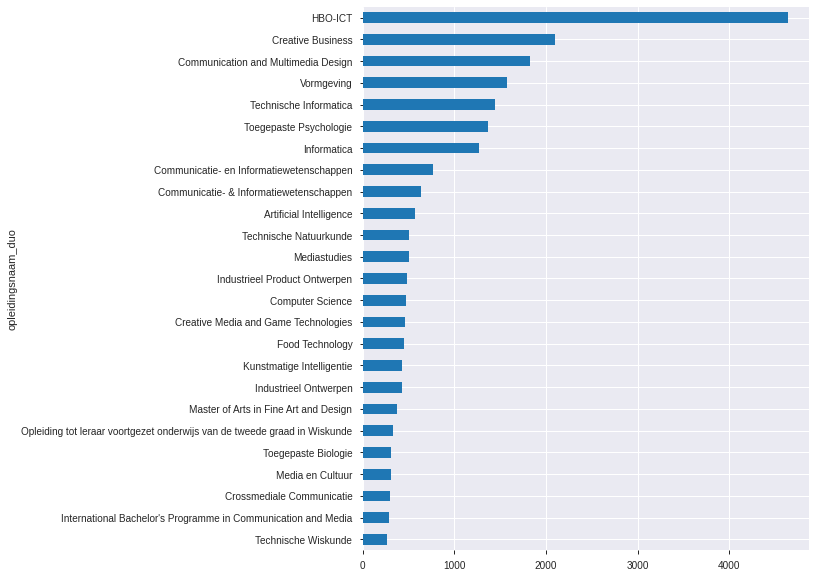

In [248]:
f = {'tot_2018_duo': 'sum'} #, 'eerstejaarsaantal_sdb' : 'sum','studentenaantal_sdb':'sum'}
q = (tech.groupby(['opleidingsnaam_duo', 'soortopleiding_duo']).agg(f)
.unstack('soortopleiding_duo')
)
idx = pd.IndexSlice
q['tot'] = q.loc[:, idx[:, ('associate degree', 'bachelor', 'master')]].sum(axis=1)


f, ax = plt.subplots(figsize=(8,10))
q['tot'].sort_values(ascending=False)[:25].plot(kind='barh', ax=ax)
ax.invert_yaxis()

In [268]:
df.head(1)

,brinnummer_duo,instellingsnaam_duo,croho_onderdeel_duo,croho_subonderdeel_duo,opleidingscode_duo,opleidingsnaam_duo,ho_type,soortopleiding_duo,gemeentenummer_duo,tot_2015_duo,tot_2016_duo,tot_2017_duo,tot_2018_duo,tot_2019_duo,cluster_sdb,sector_sdb,actieveopleiding_sdb,naamopleidingengels_sdb,eerstejaarsaantal_sdb,studentenaantal_sdb,_merge,tech_matchword
0,00DV,Protestantse Theologische Universiteit,taal en cultuur,n.v.t. (taal en cultuur),55004,Theologie (joint degree),wo,bachelor,"[14, 363]",1.0,9.0,10.0,10.0,11.0,Theologie en Levensbeschouwing,Kunst en Cultuur,1.0,Theology (joint degree),31.0,109.0,both,


In [286]:
# export to excel
export_cluster = df.groupby(['cluster_sdb', 'opleidingsnaam_duo']).size().reset_index()[['cluster_sdb', 'opleidingsnaam_duo']]
export_cluster['tech'] = np.NaN
export_cluster.to_excel("../../../data/clusters_tech_labeling.xlsx", sheet_name='clusters')